In [14]:
!pip install qiskit
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
!pip install numexpr
!pip install pylatexenc
!pip install seaborn

pip install pip install git+https://github.com/mkrphys/ipython-tikzmagic.git
%load_ext tikzmagic

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-adc5tvgt
  Running command git clone -q https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-adc5tvgt


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [21]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, execute, Aer
from qiskit_textbook.widgets import plot_bloch_vector_spherical
from qiskit.visualization import plot_state_city
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere
from qiskit.quantum_info import Statevector
from qiskit.tools.visualization import plot_bloch_multivector

from math import sqrt, pi
import numpy as np

In [ ]:
# Define a quamtum simulator
backend = Aer.get_backend('statevector_simulator')

# Quantum Computing

Quantum Computing (QC) takes advantage of the features of the Quantum Mechanics to provide massively parallel computing resources to solve certain problems.

## Some words about [Quantum Mechanics](https://en.wikipedia.org/wiki/Introduction_to_quantum_mechanics)

Quantum Mechanics (QM) is the study of matter and its interactions with energy on the scale of atomic and subatomic particles. QM shows that many properties of objects, such as position, speed, and angular momentum, that appeared continuous in the zoomed-out view of classical mechanics, turn out to be (in the very tiny, zoomed-in scale of QM) quantized. Such properties of elementary particles are required to take on one of a set of small, discrete allowable values, and since the gap between these values is also small, the discontinuities are only apparent at very tiny (atomic) scales.

Many aspects of QM are counterintuitive and can seem paradoxical because they describe behavior quite different from that seen at larger scales. For example, the [uncertainty principle](https://en.wikipedia.org/wiki/Uncertainty_principle) of QM means that the more closely one pins down one measurement (such as the position of a particle), the less accurate another complementary measurement pertaining to the same particle (such as its speed) must become. The uncertainty principle shows mathematically that the product of the uncertainty in the position and momentum of a particle (momentum is velocity multiplied by mass) could never be less than a certain value, and that this value is related to Planck's constant. 

Another example is[entanglement](https://en.wikipedia.org/wiki/Quantum_entanglement), in which a measurement of any two-valued state of a particle (such as light polarized up or down) made on either of two "entangled" particles that are very far apart causes a subsequent measurement on the other particle to always be the other of the two values (such as polarized in the opposite direction). A final example is superfluidity, in which a container of liquid helium, cooled down to near absolute zero in temperature spontaneously flows (slowly) up and over the opening of its container, against the force of gravity.

In 1913 Niels Bohr proposed a new model of the atom that included quantized electron orbits: electrons still orbit the nucleus much as planets orbit around the sun, but they are permitted to inhabit only certain orbits, not to orbit at any arbitrary distance. When an atom emitted (or absorbed) energy, the electron did not move in a continuous trajectory from one orbit around the nucleus to another, as might be expected classically. Instead, the electron would jump instantaneously from one orbit to another, giving off the emitted light in the form of a photon. The electron's wavelength determines that only Bohr orbits of certain distances from the nucleus are possible. In turn, at any distance from the nucleus smaller than a certain value, it would be impossible to establish an orbit. The minimum possible distance from the nucleus is called the Bohr radius.

In 1925, Erwin Schrödinger developed the equation that describes the behavior of a quantum-mechanical wave: the Schrödinger equation defines the permitted stationary states of a quantum system, and describes how the quantum state of a physical system changes in time. Afer a measurement, a wave function "collapses" means that a measurement has forced or converted a quantum (probabilistic or potential) state into a definite measured value. For example, before a photon actually "shows up" on a detection screen it can be described only with a set of probabilities for where it might show up. When it does appear, for instance in the CCD of an electronic camera, the time and space where it interacted with the device are known within very tight limits. However, the photon has disappeared in the process of being captured (measured), and its quantum wave function has disappeared with it. In its place, some macroscopic physical change in the detection screen has appeared, e.g., an exposed spot in a sheet of photographic film, or a change in electric potential in some cell of a CCD.

In 1929, Louis de Broglie won the Nobel Prize in Physics for his prediction that matter acts as a wave (apart from acts a particles). This is known as the Wave–Particle Duality and there is an experiment the [Double-Slit Experiment](https://en.wikipedia.org/wiki/Introduction_to_quantum_mechanics#The_double-slit_experiment)) that show this. In this experiment, the "quantum" particle acts as a wave when passing through the double slits, but as a particle when it is detected.

In 1931 Ralph Kronig originated the theory that particles such as atoms or electrons behave as if they rotate, or "spin", about an axis. Spin would account for the missing magnetic moment, and allow two electrons in the same orbital to occupy distinct quantum states if they "spun" in opposite directions, thus satisfying the exclusion principle. This can be seen in the Stern–Gerlach experiment. The Stern–Gerlach experiment demonstrates several important features of QM:

* A feature of the natural world is quantized, and able to take only certain discrete values.
* Particles possess an intrinsic angular momentum that is closely analogous to the angular momentum of a classically spinning object.
* Measurement changes the system being measured in quantum mechanics. Only the spin of an object in one direction can be known, and observing the spin in another direction destroys the original information about the spin.
* QM is probabilistic: whether the spin of any individual atom sent into the apparatus is positive or negative is random.



## Basics of [Quantum Computing](https://learn.qiskit.org/course/introduction)

### Coherence time

A quantum object (for example, a quantum bit (qubit)) is at the same time wave and particle. In fact, qubits operate like waves and are measured as particles. Ideally, the frequency components of the weaves should not change over time, at least without any external influence. However, due to physical issues this is not true and the quantum systems has a feature known as the **coherence time** that quantifies how long the state of the qubits remain measurable. Using the current technology, the coherence time is at most of fome seconds.

### Qubits cannot be replicated

At least with the current technology, when a measurement is performed on a qubit, the wave is transformed into a particle (for example, a photon) and some characteristic(s) of the original wave is(are) lost. For this reason, **the qubits cannot replicated**. Remember, to know the state of a qubit, it must be measured, action that "**collapses**" the quantum state of the qubit (with a phase and an amplitude) to one of two posibilities (for example, the up sping and the down spin of an electron), |0> or |1> depending on the distance of the state to such values, with some probability (the measurement is not deterministic). For this reason, the quantum machines must run the algorithms several times to increase the estatistical significance of the results. Notice that we cannot measure the phase of the qubit, only if is |0> or |1> with amplitude 1.

### Mathematical representation of a qubit

The state of a single qubit can be expresed by a vector written in the form of
$$
|\psi⟩
 =\alpha_0|0⟩+\alpha_1|1⟩
$$
where the coefficients $\alpha_0, \alpha_1\in \mathbb{C}$ represent the amplitude of the measurement of the bit 0 and 1, respectively, and where
$$
|0⟩ = \begin{bmatrix}
   1 \\
   0
\end{bmatrix}
\qquad\text{and}\qquad
|1⟩ = \begin{bmatrix}
   0 \\
   1
\end{bmatrix}
$$
are orthonormal basis (a *computational basis* in the context of quantum computing), i.e., any other single-qubit state can be expressed as a linear combination of these basis vectors (which might correspond e.g. to the spin-up and spin-down states of an electron that can be controlled by microwave impulses). By definition, all states must be normalized in energy and must satisfy that $|\alpha_0|^2 + |\alpha_1|^2 = 1$ (in other words, the inner product $\langle \psi|\psi\rangle=1)$.
It can be also written that
$$
|\psi⟩
 =\alpha_0\begin{bmatrix}
   1 \\
   0
\end{bmatrix}+\alpha_1\begin{bmatrix}
   0 \\
   1
\end{bmatrix} = 
\begin{bmatrix}
   \alpha_0 \\
   \alpha_1
\end{bmatrix}.
$$

Notice that $\langle 0|1\rangle = 0$.

3. The vector that represents the state of a qubit (or a register of qubits) is called *state vector*. The components of a vector state indicate the amplitude of the corresponding measurement (for example, for two qubits, the amplitude of measuring 00, 01, 10 and 11), each one with a given probability that depends on the number of posible outcomes (1/4 for the case of two qubits). Notice that if the corresponding outcome has a 0 amplitude, it must not be considered in the computation of the probabilities (if we are simulating the quantum circuit). For example, if we have the state vector
$$
|\psi\rangle=
\begin{bmatrix}
  \sqrt{\frac{1}{2}} \\
  \sqrt{\frac{1}{2}} \\ 
  0 \\
  0
\end{bmatrix} =
\sqrt{\frac{1}{2}}(|00\rangle + |01\rangle),
$$
the probability of measuring the outcome 00 is $\frac{1}{2}$, where
$$
|00\rangle =
\begin{bmatrix}
  1 \\ 0 \\ 0 \\ 0
\end{bmatrix},
\qquad
|01\rangle =
\begin{bmatrix}
  0 \\ 1 \\ 0 \\ 0
\end{bmatrix},
\qquad
|10\rangle =
\begin{bmatrix}
  0 \\ 0 \\ 1 \\ 0
\end{bmatrix}\text{, and}
\qquad
|11\rangle =
\begin{bmatrix}
  0 \\ 0 \\ 0 \\ 1
\end{bmatrix}
$$
form a *computational basis*. In this case, we say that the states $|00\rangle$ and $|01\rangle$ are *superposed*.

3. The [tensor product](https://en.wikipedia.org/wiki/Tensor_product) (or Kronecker product), denoted by $\otimes$, is used to combine quantum states, and it is the heart of digital simulators. The combined state for a qubit register is the tensor product of the constituent qubits. A theoretical example:
$$
| a b \rangle = |a\rangle |b\rangle =
| a \rangle \otimes | b \rangle =
\begin{bmatrix}
  \alpha_0 \\
  \alpha_1
\end{bmatrix} \otimes
\begin{bmatrix}
  \beta_0 \\
  \beta_1
\end{bmatrix} =
\begin{bmatrix}
  \alpha_0
  \begin{bmatrix}
    \beta_0 \\
    \beta_1
  \end{bmatrix} \\
  \alpha_1
  \begin{bmatrix}
    \beta_0 \\
    \beta_1
  \end{bmatrix}
\end{bmatrix} =
\begin{bmatrix}
  \alpha_0\beta_0 \\
  \alpha_0\beta_1 \\ 
  \alpha_1\beta_0 \\
  \alpha_1\beta_1
\end{bmatrix} =
\alpha_0\beta_0|00⟩ + \alpha_0\beta_1|01⟩ + \alpha_1\beta_0|10⟩ + \alpha_1\beta_1|11⟩,
$$
where
$$
(\alpha_0\beta_0)^2 + (\alpha_0\beta_1)^2 + (\alpha_1\beta_0)^2 + (\alpha_1\beta_1)^2=1.
$$
Notice that the number of possible states of a quantum computer is $2^n$ where $n$ is the number of qubits. In other words, the number of coefficients (that represents the amplitude of the qubit of being in the corresponding state, for example, 00) of a *state vector* (that represents the state of a quantum register) is $2^n$ for $n$ qubits.

In [2]:
# Show the state vector of qubit |0>:

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(1) # Define one qubit
sv = Statevector(qc)  # Compute the state vector
print(sv.draw())

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


In [4]:
# Show the state vector of qubits |10>):

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(2)   # Define one qubit
qc.initialize([0, 1], 1) # The 1th qubit is |1⟩
sv = Statevector(qc)     # Compute the state vector
print(sv.draw())

Statevector([6.123234e-17+0.j, 0.000000e+00+0.j, 1.000000e+00+0.j,
             0.000000e+00+0.j],
            dims=(2, 2))


### What is different from clasical bits?

* A (clasical) bit can be 0 or 1.
* A qubit can be $|0⟩$ and $|1⟩$, at the same time thanks to the superposition. Therefore, with one qubit we represent "in parallel" a operation but for the two possible values. For example, denoting a quantum state $|\psi⟩$ in a "50% superposition" of (being at the same time) $|0⟩$ and $|1⟩$ could be written as:

$$
|\psi⟩=
\begin{bmatrix}
   \frac{1}{\sqrt{2}} \\
   \frac{i}{\sqrt{2}}
\end{bmatrix}=
\frac{1}{\sqrt{2}}\begin{bmatrix}
   1 \\
   0
\end{bmatrix} +
\frac{i}{\sqrt{2}}\begin{bmatrix}
   0 \\
   1
\end{bmatrix} =
\frac{1}{\sqrt{2}}|0⟩ +
\frac{i}{\sqrt{2}}|1⟩
$$

And this is true for concatenation of qubits bits.

* Two bits can be 00, (or) 01, (or) 10 or 11.
* Two qubits $|\psi\phi⟩=\alpha_{00}|00⟩ + \alpha_{01}|01⟩ + \alpha_{10}|10⟩ + \alpha_{11}|11⟩$ can be $|00⟩$, (and) $|01⟩$, (and) $|10⟩$, and $|11⟩$, at the same time. Therefore, we can be performing a operation to all the combinations of 2 qubits at the same time.

Notice that a quantum state (the value of a qubit before a measurement, that always is a probabilistic process) can be a complex number.

## Quantum algorithm

So what is the general flow of a quantum algorithm? First, we prepare the superposition. Then we encode the problem information into the superposition and manipulate it in a high dimensional space. Finally, we apply interference to consolidate the superposition into fewer outcomes. (Note: there are other possibilities and omitted for simplicity.)


## Measuring qubits

* In quantum mechanics, measurements collapse to one of the possible observed states. Let
$$
|\psi⟩
 =\alpha_0|0⟩+\alpha_1|1⟩.
$$
After measuring $|\psi⟩$ we will obtain 0 with probability $|\alpha_0|^2$ and 1 with probability $|\alpha_0|^2$ (remember that quantum state coefficients can be complex numbers and $i^2=-1$), where $|\alpha_0|^2 + |\alpha_0|^2 = 1$. For example, if
$$
|\psi⟩
 =\frac{1}{\sqrt{2}}|0⟩+\frac{1}{\sqrt{2}}|1⟩
$$
we will obtain 0 or 1 with the same probability $1/2$.

* Notice that after measuring a register of qubits, its quantum state (i.e., the possible superposition state) is lost.

## Probabilities are not enough
We cannot describe some quantum states using only probabilities, because qubits are waves and have amplitude and phase.

## [The Bloch Sphere](https://en.wikipedia.org/wiki/Bloch_sphere)

Shows the state of a qubit. Let
$$
|\psi\rangle = \alpha|0\rangle + \beta|1\rangle, ~\alpha,\beta\in\mathbb{C}.
$$
Using the [modulus, argument (phase)]-representation,
$$
|\psi\rangle = r_\alpha e^{i\phi_\alpha}|0\rangle + r_\beta e^{i\phi_\beta}|1\rangle, ~r_\alpha,r_\beta,\phi_\alpha,\phi_\beta\in\mathbb{R}.
$$

We can decrease the number of parameters to represent $|\psi\rangle$ taking into cosideration that the physical properties of the qubit does not change if the multiply the qubit by $1e^{-i\psi_\alpha}$. In other words,
$$
|\psi\rangle \equiv
1e^{-i\psi_\alpha} |\psi\rangle =
r_\alpha|0\rangle + r_\beta e^{i(\psi_\beta-\psi_\alpha)}|1\rangle,\qquad\text{(1)}
$$
where $r_\alpha$ and $r_\beta$ are the absolute values of the amplitudes of $\alpha$ and $\beta$. The square of the absolute value of each amplitude indicates the probability to measure the qubit in the corresponding state, and therefore
$$
r_\alpha^2 + r_\beta^2 = 1,~r_\alpha,r_\beta=[0,1].
$$
If now we define $\theta/2$ as the angle that $r_\alpha$ and $r_\beta$ describe

<img src="graphics/r.svg" width="150"/>

where
$$
r_\alpha=\cos\frac{\theta}{2}, \qquad r_\beta=\sin\frac{\theta}{2}, \qquad\theta\in[0,\pi],
$$
we can write that
$$
|\psi\rangle = \cos\frac{\theta}{2}|0\rangle + \sin\frac{\theta}{2}e^{i\varphi}|1\rangle
$$
where (see Eq. 1)
$$
\varphi=\varphi_\beta-\varphi_\alpha,\qquad\varphi\in[0,2\pi[
$$
and
$$
\theta = 2\cos^{-1}r_\alpha=2\sin^{-1}r_\beta.
$$

<img src="bloch_sphere.png" width="300"/>

## Interaction between qubits

When qubits interact with each other we must take into consideration that they behave like periodical 1D waves, with an amplitude (by definition, normalized between -1 and 1) and a phase. Therefore, some physical phenomena such as interferences can happen. For example, two qubits with the same amplitude can cancel each other if they have exactly the oposite plase.

### Entangled states

Two (or more) qubits are entangled when we cannot express their state using a (tensor) product of states. For example
$$
|\Phi^+\rangle =
\frac{1}{\sqrt{2}}
\begin{bmatrix}
  1 \\ 0 \\ 0 \\ 1
\end{bmatrix}
$$
is an entangled state because there is not product between two qubits that generates such state.

Entangled:
$$
\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

Not entangled:
$$
\frac{1}{\sqrt{2}}(|10\rangle + |11\rangle)
$$


### Define and measure a qubit (using [Qiskit](https://qiskit.org/))

#### Create a quantum circuit with one qubit

In [ ]:
qc = QuantumCircuit(1 ,1) # Number of qubits, number of standard bits

#### Tell Qiskit how to simulate our circuit

In [ ]:
backend = Aer.get_backend('statevector_simulator')

#### Define a $|0⟩$

In [ ]:
qc.initialize([1, 0], 0) # The 0th qubit is |0⟩

#### "Draw" the circuit:

In [ ]:
qc.measure([0], [0])
qc.draw()

In [ ]:
qc = QuantumCircuit(1 ,1) 
qc.initialize([0, 1], 0) # The 0th qubit is |1⟩
qc.measure([0], [0])
qc.draw()

Notice that the "0" below "M" references the bit index, not the bit value!

#### Run the circuit

In [ ]:
job = execute(qc, backend)
result = job.result()
quantum_state = result.get_statevector(qc, decimals=3)
quantum_state

In [ ]:
plot_bloch_multivector(quantum_state)

#### Measure the qubit (v1)

In [ ]:
counts = result.get_counts()
print(counts)

This indicates that the measured bit is 1 and that it has been measured just once.

In [ ]:
plot_histogram(counts)

## Quantum gates

A quantum gates manipulates the spin/state of one or several qubits. In mathematical terms, quantum gates are linear operations. Because qubits are vectors, quantum gates are matrices. Quantum gates are reversible, meaning that applying a quantum gate allows you to figure out the original information as well. Notice that this implies that all of the matrices associated to a gate must be invertible (not singular). 

Each gate has a different "transition matrix" where the amplitudes of the qubits are modified.

All gates must conserve the energy, i.e., the quantum gates are *unitary*.

All gates have the same number of outputs than inputs.

### The identity ($\mathbf{I}$) Gate

$$
\mathbf{I}=\begin{bmatrix}
   1 & 0 \\
  0 & 1
\end{bmatrix}
$$

Unitary operation that perfoms

$$
\mathbf{X}|0⟩=
\begin{bmatrix}
   1 & 0 \\
   0 & 1
\end{bmatrix}
\begin{bmatrix}
   1 \\
   0
\end{bmatrix}=
\begin{bmatrix}
   1 \\
   0
\end{bmatrix}=
|0⟩
\qquad
\mathbf{X}|1⟩=
\begin{bmatrix}
   1 & 0 \\
   0 & 1
\end{bmatrix}
\begin{bmatrix}
   0 \\
   1
\end{bmatrix}=
\begin{bmatrix}
   0 \\
   1
\end{bmatrix}=
|1⟩
$$

or simply

$$
\begin{array}{l}
|0⟩ \rightarrow |0⟩\\
|1⟩ \rightarrow |1⟩.
\end{array}
$$

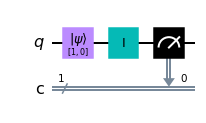

In [45]:
# Define a QC with one I gate applied to |0>.
qc = QuantumCircuit(1, 1)
qc.initialize([1, 0], 0) # The 0th qubit is |0⟩
qc.i(qubit=0)
qc.measure([0], [0])
qc.draw(output='mpl')

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


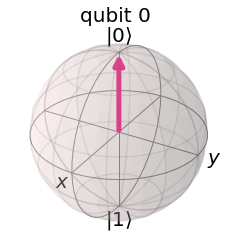

In [46]:
# Simulate and visualize the state vector of the QC.
job = execute(qc, backend)
result = job.result()
quantum_state = result.get_statevector(qc, decimals=3)
print(quantum_state)
plot_bloch_multivector(quantum_state)

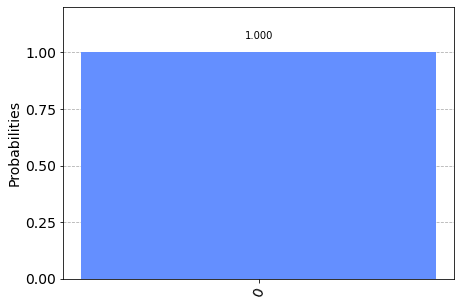

In [44]:
# Measure the output.
counts = result.get_counts()
plot_histogram(counts)

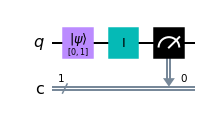

In [30]:
# Define a QC with one I gate applied to |1>.
qc = QuantumCircuit(1, 1)
qc.initialize([0, 1], 0) # The 0th qubit is |0⟩
qc.i(qubit=0)
qc.measure([0], [0])
qc.draw(output='mpl')

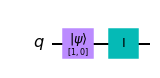

In [36]:
qc = QuantumCircuit(1)
backend = Aer.get_backend('statevector_simulator')
qc.initialize([1, 0], 0) # The 0th qubit is |0⟩
qc.i(qubit=0)
qc.draw(output='mpl')

In [37]:
job = execute(qc, backend)
result = job.result()
quantum_state = result.get_statevector(qc, decimals=3)
quantum_state

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


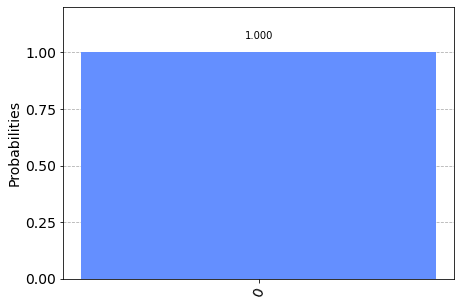

In [38]:
counts = result.get_counts()
plot_histogram(counts)

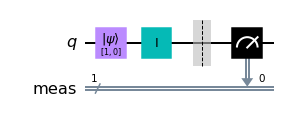

In [39]:
qc.measure_all()
qc.draw(output='mpl')

### The Pauli $\mathbf{X}$ gate

$$
\mathbf{X}=\begin{bmatrix}
   0 & 1 \\
   1 & 0
\end{bmatrix}
$$

This is a "not" gate:

$$
\mathbf{X}|0⟩=
\begin{bmatrix}
   0 & 1 \\
   1 & 0
\end{bmatrix}
\begin{bmatrix}
   1 \\
   0
\end{bmatrix}=
\begin{bmatrix}
   0 \\
   1
\end{bmatrix}=
|1⟩
\qquad
\mathbf{X}|1⟩=
\begin{bmatrix}
   0 & 1 \\
   1 & 0
\end{bmatrix}
\begin{bmatrix}
   0 \\
   1
\end{bmatrix}=
\begin{bmatrix}
   1 \\
   0
\end{bmatrix}=
|0⟩
$$

Geometrically (in the Bloch sphere), we can visualize the $\mathbf{X}$ gate rotating a quantum state by π radians about the X-axis.

### Let's compute $\mathbf{X}|0⟩$

In [ ]:
qc = QuantumCircuit(1)
backend = Aer.get_backend('statevector_simulator')
qc.initialize([1, 0], 0) # The 0th qubit is |0⟩
qc.x(qubit=0)

In [ ]:
job = execute(qc, backend)
result = job.result()
quantum_state = result.get_statevector(qc, decimals=3)
quantum_state

In [ ]:
counts = result.get_counts()
plot_histogram(counts)

### Let's compute $\mathbf{X}|1⟩$

In [ ]:
qc = QuantumCircuit(1)
backend = Aer.get_backend('statevector_simulator')
qc.initialize([0, 1], 0) # The 0th qubit is |0⟩
qc.x(qubit=0)

In [ ]:
job = execute(qc, backend)
result = job.result()
quantum_state = result.get_statevector(qc, decimals=3)
quantum_state

In [ ]:
counts = result.get_counts()
plot_histogram(counts)

### The Pauli Y Gate

$$
Y=\begin{bmatrix}
   0 & -i \\
  i & 0
\end{bmatrix}
$$

The Y gate rotate a quantum state by $\pi$ radians about the $y$ axe. 

$$
Y|0⟩=
\begin{bmatrix}
   0 & -i \\
   i & 0
\end{bmatrix}
\begin{bmatrix}
   1 \\
   0
\end{bmatrix}=
\begin{bmatrix}
   0 \\
   i
\end{bmatrix}
\qquad
Y|1⟩=
\begin{bmatrix}
   0 & -i \\
   i & 0
\end{bmatrix}
\begin{bmatrix}
   0 \\
   1
\end{bmatrix}=
\begin{bmatrix}
   -i \\
   0
\end{bmatrix}
$$

In [ ]:
qc = QuantumCircuit(1)
backend = Aer.get_backend('statevector_simulator')
qc.initialize([1, 0], 0) # The 0th qubit is |0⟩

In [ ]:
job = execute(qc, backend)
result = job.result()
quantum_state = result.get_statevector(qc, decimals=3)
quantum_state

In [ ]:
plot_bloch_multivector(quantum_state)

In [ ]:
qc = QuantumCircuit(1)
backend = Aer.get_backend('statevector_simulator')
qc.initialize([1, 0], 0) # The 0th qubit is |0⟩
qc.y(qubit=0)

In [ ]:
job = execute(qc, backend)
result = job.result()
quantum_state = result.get_statevector(qc, decimals=3)
quantum_state

In [ ]:
plot_bloch_multivector(quantum_state)

### The Pauli $\mathbf{Z}$ Gate

$$
\mathbf{Z}=\begin{bmatrix}
   1 & 0 \\
  0 &-1
\end{bmatrix}
$$

The $\mathbf{Z}$ gate rotate a quantum state by $\pi$ radians about the $Z$ axe. 

$$
\mathbf{Z}|0⟩=
\begin{bmatrix}
   1 & 0 \\
   0 & -1
\end{bmatrix}
\begin{bmatrix}
   1 \\
   0
\end{bmatrix}=
\begin{bmatrix}
   1 \\
   0
\end{bmatrix}
\qquad
\mathbf{Z}|1⟩=
\begin{bmatrix}
   1 & 0 \\
   0 & -1
\end{bmatrix}
\begin{bmatrix}
   0 \\
   1
\end{bmatrix}=
\begin{bmatrix}
   0 \\
   -1
\end{bmatrix}
$$

We can see that applying the $\mathbf{Z}$ gate to our basis vectors gives us the same measurement since the negative sign (phase; we can worry about that later) is inconsequential when we measure the quantum state. Thus, $|0⟩$ and $|1⟩$ are the eigenstates of the $\mathbf{Z}$ gate and are often called the Z-basis.

In [ ]:
qc = QuantumCircuit(1)
backend = Aer.get_backend('statevector_simulator')
qc.initialize([1/2, sqrt(3)*1j/2], 0)

In [ ]:
job = execute(qc, backend)
result = job.result()
quantum_state = result.get_statevector(qc, decimals=3)
quantum_state

In [ ]:
plot_bloch_multivector(quantum_state)

In [ ]:
qc = QuantumCircuit(1)
backend = Aer.get_backend('statevector_simulator')
qc.initialize([1/2, sqrt(3)*1j/2], 0) # The 0th qubit is |0⟩
qc.z(qubit=0)

In [ ]:
job = execute(qc, backend)
result = job.result()
quantum_state = result.get_statevector(qc, decimals=3)
quantum_state

In [ ]:
plot_bloch_multivector(quantum_state)

### The $\mathbf{H}$ (Hadamard) Gate

The H gate is defined by
$$
\mathbf{H}= \frac{1}{\sqrt{2}}
\begin{bmatrix}
   1 & 1 \\
   1 & -1
\end{bmatrix},
$$
that when it is applied to the "basis" qubits, we generate 
$$
\mathbf{H}|0⟩= \frac{1}{\sqrt{2}}
\begin{bmatrix}
   1 & 1 \\
   1 & -1
\end{bmatrix}
\begin{bmatrix}
   1 \\
   0
\end{bmatrix}=
\frac{1}{\sqrt{2}}
\begin{bmatrix}
   1 \\
   1
\end{bmatrix} = \frac{|0\rangle + |1\rangle}{\sqrt{2}} = 
|+⟩
\\
\text{and}
\\
\mathbf{H}|1⟩= \frac{1}{\sqrt{2}}
\begin{bmatrix}
   1 & 1 \\
   1 & -1
\end{bmatrix}
\begin{bmatrix}
   0 \\
   1
\end{bmatrix}=
\frac{1}{\sqrt{2}}
\begin{bmatrix}
   1 \\
   -1
\end{bmatrix}= \frac{|0\rangle - |1\rangle}{\sqrt{2}} =
|-⟩,
$$
that is commonly used as a computational basis (notice that $|+\rangle$ and $|-\rangle$ are orthogonal).

We can see that hese states are the [eigenvectors](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) for the $\mathbf{X}$ gate because

$$
\mathbf{X}|+⟩= 
\begin{bmatrix}
   0 & 1 \\
   1 & 0
\end{bmatrix}
\frac{1}{\sqrt{2}}
\begin{bmatrix}
   1 \\
   1
\end{bmatrix}=
\frac{1}{\sqrt{2}}
\begin{bmatrix}
   1 \\
   1
\end{bmatrix} = |+⟩
\qquad
\mathbf{X}|-⟩= 
\begin{bmatrix}
   0 & 1 \\
   1 & 0
\end{bmatrix}
\frac{1}{\sqrt{2}}
\begin{bmatrix}
   1 \\
   -1
\end{bmatrix}=
\frac{1}{\sqrt{2}}
\begin{bmatrix}
   -1 \\
   1
\end{bmatrix} = |-⟩
$$



The H-gate seems to give a 50-50 chance of transforming the qubit from |0⟩ (and |1⟩) to either |0⟩ or |1⟩. In a quantum computer, you can create a superposition state in a qubit using the Hadamard gate:


We define


Where $|+⟩$ and $|-⟩$ 

Geometrically the $\mathbf{H}$ gate can be visualized as a rotation around the vector [1 0 1] on the Bloch sphere, which lies in between the X and Z-axis. This is also a way to transform a state between the X and Z bases.

In [ ]:
qc = QuantumCircuit(1)
backend = Aer.get_backend('statevector_simulator')
qc.initialize([1, 0], 0)

In [ ]:
job = execute(qc, backend)
result = job.result()
quantum_state = result.get_statevector(qc, decimals=3)
quantum_state

In [ ]:
plot_bloch_multivector(quantum_state)

In [ ]:
qc = QuantumCircuit(1)
backend = Aer.get_backend('statevector_simulator')
qc.initialize([1, 0], 0) # The 0th qubit is |0⟩
qc.h(qubit=0)

In [ ]:
job = execute(qc, backend)
result = job.result()
quantum_state = result.get_statevector(qc, decimals=3)
quantum_state

In [ ]:
plot_bloch_multivector(quantum_state)

### The $\mathbf{R}_\phi$ Gate (unfinished)

This gate is parameterized by a real number 𝜙 and can be represented as
$$
R_\phi= 
\begin{bmatrix}
   1 & 0 \\
   0 & e^{i\phi}
\end{bmatrix};
 \quad \phi\in\mathbb{R}.
 $$
 
Geometrically, the $\mathbf{R}_\phi$ gate can be visualized as rotating a Bloch vector by a value of $\phi$ about the Z-axis. Notice that the Pauli Z gate is just the $\mathbf{R}_\phi$ gate where $\phi=\pi$.

In [ ]:
qc = QuantumCircuit(1)
backend = Aer.get_backend('statevector_simulator')
qc.initialize([1, 0], 0)

In [ ]:
job = execute(qc, backend)
result = job.result()
quantum_state = result.get_statevector(qc, decimals=3)
quantum_state

In [ ]:
plot_bloch_multivector(quantum_state)

In [ ]:
qc = QuantumCircuit(1)
backend = Aer.get_backend('statevector_simulator')
qc.initialize([1, 0], 0) # The 0th qubit is |0⟩
qc.r(theta=45, phi=0, qubit=0)

In [ ]:
job = execute(qc, backend)
result = job.result()
quantum_state = result.get_statevector(qc, decimals=3)
quantum_state

In [ ]:
plot_bloch_multivector(quantum_state)

### The $\mathbf{S}$ Gate (unfinished)

The $\mathbf{S}$ gate is the $\mathbf{R}_\phi$ gate where $\phi=\pi/2$. It is also called the $\sqrt(\mathbf{Z})$ gate as $\mathbf{SS}|q⟩=\mathbf{Z}|q⟩$.

In [ ]:
qc = QuantumCircuit(1)
backend = Aer.get_backend('statevector_simulator')
qc.initialize([1, 0], 0)

In [ ]:
job = execute(qc, backend)
result = job.result()
quantum_state = result.get_statevector(qc, decimals=3)
quantum_state

In [ ]:
plot_bloch_multivector(quantum_state)

In [ ]:
qc = QuantumCircuit(1)
backend = Aer.get_backend('statevector_simulator')
qc.initialize([1, 0], 0) # The 0th qubit is |0⟩
qc.r(theta=45, phi=0, qubit=0)

In [ ]:
job = execute(qc, backend)
result = job.result()
quantum_state = result.get_statevector(qc, decimals=3)
quantum_state

In [ ]:
plot_bloch_multivector(quantum_state)

### The $\mathbf{T}$ Gate (unfinished)

The $\mathbf{T}$ gate is the $\mathbf{R}_\phi$ gate where $\phi=\pi/4$ and is the 4th root of the $\mathbf{Z}$ Gate.

### The $\mathbf{U_3}$ Gate (unfinished)
$$
\mathbf{U_3}= 
\begin{bmatrix}
   cos(\frac{\theta}{2}) & -e^{iπ}sin(\frac{\theta}{2}) \\
   e^{i\phi}sin(\frac{\theta}{2}) & e^{i\lambda+i\phi}cos(\frac{\theta}{2})
\end{bmatrix}
 \quad \theta,\phi, \lambda\in\mathbb R
$$

### Toffoli ($\text{cc}\mathbf{+}$)

The Toffoli gate is essentially the atom of mathematics. It is the simplest element, from which every other problem-solving technique can be compiled.

$$
\text{cc}\mathbf{+} = 
\begin{bmatrix}
  1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
  0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
  0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
  0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
  0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
  0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
  0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
  0 & 0 & 0 & 0 & 0 & 0 & 1 & 0  
\end{bmatrix}
$$


### CNOT (Controlled-NOT) gate

$$
\text{CNOT} = 
\begin{bmatrix}
  1 & 0 & 0 & 0 \\
  0 & 0 & 0 & 1 \\
  0 & 0 & 1 & 0 \\
  0 & 1 & 0 & 0
\end{bmatrix}
$$


### $\mathbf{V}$ gate

$$
\mathbf{V} = \frac{1+i}{2}
\begin{bmatrix}
  1 & -i \\
  -i & 1
\end{bmatrix}
$$

### Controlled-$\mathbf{V}$ (gate

$$
C\mathbf{V} = \frac{1+i}{2}
\begin{bmatrix}
  1 & 0 & 0 & 0 \\
  0 & 1 & 0 & 0 \\
  0 & 0 & 1 & -i \\
  0 & 0 & -i & 1
\end{bmatrix}
$$

### $\mathbf{V_+}$ gate

$$
\mathbf{V} = \frac{1-i}{2}
\begin{bmatrix}
  1 & i \\
  i & 1
\end{bmatrix}
$$

### Controlled-$\mathbf{V_+}$ gate

$$
C\mathbf{V} = \frac{1-i}{2}
\begin{bmatrix}
  1 & 0 & 0 & 0 \\
  0 & 1 & 0 & 0 \\
  0 & 0 & 1 & i \\
  0 & 0 & i & 1
\end{bmatrix}
$$

### Swap gate

$$
\text{CNOT} = 
\begin{bmatrix}
  1 & 0 & 0 & 0 \\
  0 & 0 & 1 & 1 \\
  0 & 1 & 0 & 0 \\
  0 & 0 & 0 & 1
\end{bmatrix}
$$

### cx gate
Also known as the controlled-X or controlled-NOT, it is an entangling gate.


In [7]:
# Creating entanglement

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
qc = QuantumCircuit(2)
print(Statevector(qc).draw())
qc.h(1)
print(Statevector(qc).draw())
qc.cx(1,0)
print(Statevector(qc).draw())

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
Statevector([0.70710678+0.j, 0.        +0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [8]:
# Creating entanglement, again

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
qc = QuantumCircuit(2)
print(Statevector(qc).draw())
qc = QuantumCircuit(2)
print(Statevector(qc).draw())
qc.h(0)
print(Statevector(qc).draw())
qc.h(1)
print(Statevector(qc).draw())
qc.cx(1,0)
print(Statevector(qc).draw())
qc.z(0)
print(Statevector(qc).draw())
qc.cx(1,0)
print(Statevector(qc).draw())

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
Statevector([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j],
            dims=(2, 2))
Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))
Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))
Statevector([ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j],
            dims=(2, 2))
Statevector([ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j],
            dims=(2, 2))


### cz gate

Entangling gate.

### Peres gate

$P = A, Q = A \oplus B, and R = (A · B) \oplus C)$

## [Adding 2 qubits](https://learn.qiskit.org/course/introduction/the-atoms-of-computation#the-15-176)

We are going to implement a "half adder" defined by:

    0 + 0 = 00
    0 + 1 = 01
    1 + 0 = 01
    1 + 1 = 10
    
As it can be seen, the LSb of the output of the adder is the output a clasical XOR gate, which in the quantum world can be implemented by the ‘controlled-NOT gate’ (CNOT) controlled by qubit 0 and targeting qubit 1. The MSb can be implemented by a Toffoli gate (that is like an clasical AND gate).

In [ ]:
qc = QuantumCircuit(4 ,2)
backend = Aer.get_backend('statevector_simulator')
qc.x(0) # By default, the qubits are |0⟩ and this creates |1⟩.
qc.x(1)
qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,3)
qc.measure(2,0)
qc.measure(3,1)
qc.draw()

In [ ]:
job = execute(qc, backend)
result = job.result()
quantum_state = result.get_statevector(qc, decimals=3)
quantum_state

In [ ]:
result.get_counts()

## Using entanglement for super-dense coding

In [13]:
MESSAGE = '00'

MESSAGE = '00'

qc_alice = QuantumCircuit(2,2)
qc_alice.h(1)
qc_alice.cx(1,0)

if MESSAGE[-2]=='1':
    qc_alice.z(1)
if MESSAGE[-1]=='1':
    qc_alice.x(1)

print(Statevector(qc_alice).draw())

qc_bob = QuantumCircuit(2,2)
# Bob unentangles
qc_bob.cx(1,0)
qc_bob.h(1)
# Then measures
qc_bob.measure([0,1],[0,1])

from qiskit import Aer
backend = Aer.get_backend('aer_simulator')

# Bob measures
qc_bob = QuantumCircuit(2,2)
qc_bob.measure([0,1],[0,1])

backend.run(qc_alice.compose(qc_bob)).result().get_counts()

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


## The [Deutsch–Jozsa algorithm](https://en.wikipedia.org/wiki/Deutsch%E2%80%93Jozsa_algorithm)

In the Deutsch–Jozsa problem, we are given a black box quantum computer known as an "oracle" that implements some function $f\colon\{0,1\}^n\rightarrow \{0,1\}$. The function takes $n$-digit binary values as input and produces either a 0 or a 1 as output for each such value. We are promised that the function is either "constant" (0 on all possible inputs or 1 on all possible inputs) or "balanced" (returns 1 for half of the input function domain and 0 for the other half). The task then is to determine if $f$ is constant or balanced by using the oracle.

## Superposition
When we say the spin of a particle is in a superposition of states, it simply means it is in a linear combination of up spin and down spin. Here is the equation in the Dirac notation.

## Links

https://jonathan-hui.medium.com/qc-quantum-computing-series-10ddd7977abd
